In [1]:
## Import the necessary libraries

In [2]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("MLJ")
Pkg.add("MLJBase")
Pkg.add("DecisionTree")

   Resolving package versions...
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Manifest.toml`


In [3]:
Pkg.add("CSV")

   Resolving package versions...
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Manifest.toml`


In [4]:
## import and read the dataset
using CSV
using DataFrames

data_set = CSV.read("fish_data.csv", DataFrame)
first(data_set, 5)

5×4 DataFrame
 Row │ species             length   weight   w_l_ratio 
     │ String31            Float64  Float64  Float64   
─────┼─────────────────────────────────────────────────
   1 │ Anabas testudineus    10.66     3.45       0.32
   2 │ Anabas testudineus     6.91     3.27       0.47
   3 │ Anabas testudineus     8.38     3.46       0.41
   4 │ Anabas testudineus     7.57     3.36       0.44
   5 │ Anabas testudineus    10.83     3.38       0.31

In [5]:
## Split the whole dataset into training set and testing set

In [6]:
using MLJBase

training_set, testing_set = partition(data_set,0.8, shuffle=false)
first(training_set,5)

5×4 DataFrame
 Row │ species             length   weight   w_l_ratio 
     │ String31            Float64  Float64  Float64   
─────┼─────────────────────────────────────────────────
   1 │ Anabas testudineus    10.66     3.45       0.32
   2 │ Anabas testudineus     6.91     3.27       0.47
   3 │ Anabas testudineus     8.38     3.46       0.41
   4 │ Anabas testudineus     7.57     3.36       0.44
   5 │ Anabas testudineus    10.83     3.38       0.31

In [7]:
last(testing_set,5)

5×4 DataFrame
 Row │ species                 length   weight   w_l_ratio 
     │ String31                Float64  Float64  Float64   
─────┼─────────────────────────────────────────────────────
   1 │ Otolithoides biauritus    12.9      2.6        0.2
   2 │ Otolithoides biauritus    14.66     2.63       0.18
   3 │ Otolithoides biauritus    13.17     2.68       0.2
   4 │ Otolithoides biauritus    16.77     3.03       0.18
   5 │ Anabas testudineus        17.35     3.11       0.18

## Explotary Data Analysis (EDA)

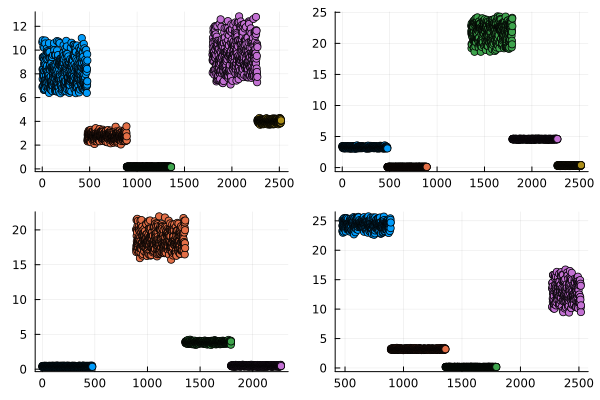

In [8]:
using StatsPlots

@df training_set scatter(
    [:length, :weight, :w_l_ratio],
    group = :species,
    layout = (2, 2),
    legend = :false
)


In [9]:
## check the null values of the training_set

In [10]:
allowmissing!(training_set)
col_has_missing = map(col->any(ismissing,col), eachcol(data_set))
col_has_missing

4-element Vector{Bool}:
 0
 0
 0
 0

In [11]:
## Verify the dimension of the training_set

In [12]:
println("Total Observations in training_set: ", size(training_set,1))
println("Total Features in training_set: ", size(training_set,2))


Total Observations in training_set: 2518
Total Features in training_set: 4


In [13]:
## Seperate the training_set into the independent variables (x) and dependent variable (y)

In [14]:
X = Matrix(training_set[:,Not(:species)])
first(X,5)

5-element Vector{Union{Missing, Float64}}:
 10.66
  6.91
  8.38
  7.57
 10.83

In [15]:
y= Vector(training_set[:, :species])
first(y,5)

5-element Vector{Union{Missing, String31}}:
 "Anabas testudineus"
 "Anabas testudineus"
 "Anabas testudineus"
 "Anabas testudineus"
 "Anabas testudineus"

In [16]:
using DecisionTree
using Random

In [17]:
## set the random seed for reproducibility
Random.seed!(123)

TaskLocalRNG()

In [18]:
## Create the random permutation of indices

In [19]:
indices = shuffle(1:size(X, 1))
first(indices,5)

5-element Vector{Int64}:
 1131
 2274
  874
  861
  772

In [20]:
## Define the split ratio

In [21]:
train_ratio = 0.8
train_size = Int(round(train_ratio *size(X,1)))

2014

In [22]:
## Split the indices

In [23]:
train_indices = indices[1:train_size]
test_indices = indices[(train_size + 1):end]

504-element Vector{Int64}:
  290
  852
   39
 1717
  586
  133
 1257
  306
 2518
 1222
 1840
 1014
   85
    ⋮
 1350
  867
 2268
 1622
  175
 1974
  805
 1863
   89
  654
 1998
 1706

In [24]:
## create the training and testing set

In [25]:
X_train = X[train_indices,:]
y_train = y[train_indices]
X_test =X[test_indices,:]
y_test = y[test_indices]

504-element Vector{Union{Missing, String31}}:
 "Anabas testudineus"
 "Coilia dussumieri"
 "Anabas testudineus"
 "Otolithoides pama"
 "Coilia dussumieri"
 "Anabas testudineus"
 "Otolithoides biauritus"
 "Anabas testudineus"
 "Polynemus paradiseus"
 "Otolithoides biauritus"
 "Pethia conchonius"
 "Otolithoides biauritus"
 "Anabas testudineus"
 ⋮
 "Otolithoides biauritus"
 "Coilia dussumieri"
 "Pethia conchonius"
 "Otolithoides pama"
 "Anabas testudineus"
 "Pethia conchonius"
 "Coilia dussumieri"
 "Pethia conchonius"
 "Anabas testudineus"
 "Coilia dussumieri"
 "Pethia conchonius"
 "Otolithoides pama"

In [47]:
# Create the model
model = DecisionTree.DecisionTreeClassifier(max_depth=4)  # Use = for keyword argument

# Fit the model on the training data
DecisionTree.fit!(model, X_train, y_train)  # Qualify with DecisionTree



DecisionTreeClassifier
max_depth:                4
min_samples_leaf:         1
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  Union{Missing, String31}[String31("Anabas testudineus"), String31("Coilia dussumieri"), String31("Otolithoides biauritus"), String31("Otolithoides pama"), String31("Pethia conchonius"), String31("Polynemus paradiseus")]
root:                     Decision Tree
Leaves: 7
Depth:  3

In [31]:
## Display the train and test size

In [32]:
println("Training Set Size: ", size(X_train), " Features: ", length(y_train)," Labels")
println("Testing Set Size: ", size(X_test), " Features: ", length(y_test)," Labels")

Training Set Size: (2014, 3) Features: 2014 Labels
Testing Set Size: (504, 3) Features: 504 Labels


In [33]:
## Make the predictions

In [34]:
y_pred = DecisionTree.predict(model, X_test)

504-element Vector{Union{Missing, String31}}:
 "Anabas testudineus"
 "Coilia dussumieri"
 "Anabas testudineus"
 "Otolithoides pama"
 "Coilia dussumieri"
 "Anabas testudineus"
 "Otolithoides biauritus"
 "Anabas testudineus"
 "Polynemus paradiseus"
 "Otolithoides biauritus"
 "Pethia conchonius"
 "Otolithoides biauritus"
 "Anabas testudineus"
 ⋮
 "Otolithoides biauritus"
 "Coilia dussumieri"
 "Pethia conchonius"
 "Otolithoides pama"
 "Anabas testudineus"
 "Pethia conchonius"
 "Coilia dussumieri"
 "Pethia conchonius"
 "Anabas testudineus"
 "Coilia dussumieri"
 "Pethia conchonius"
 "Otolithoides pama"

In [35]:
## Check the model accuracy

In [36]:
accuracy = sum(y_pred .== y_test)/length(y_test)
println("Accuracy ", accuracy)

Accuracy 1.0


## Explotar Data Analysis for test data

In [37]:
last(testing_set, 50)

50×4 DataFrame
 Row │ species                 length   weight   w_l_ratio 
     │ String31                Float64  Float64  Float64   
─────┼─────────────────────────────────────────────────────
   1 │ Otolithoides biauritus    11.97     2.62       0.22
   2 │ Otolithoides biauritus    13.72     2.67       0.19
   3 │ Otolithoides biauritus    13.15     2.6        0.2
   4 │ Otolithoides biauritus    12.76     2.63       0.21
   5 │ Otolithoides biauritus    14.45     2.69       0.19
   6 │ Otolithoides biauritus    14.15     2.63       0.19
   7 │ Otolithoides biauritus    13.92     2.66       0.19
   8 │ Otolithoides biauritus    14.65     2.65       0.18
   9 │ Otolithoides biauritus    11.88     2.64       0.22
  10 │ Otolithoides biauritus    14.04     2.64       0.19
  11 │ Otolithoides biauritus    14.09     2.64       0.19
  ⋮  │           ⋮                ⋮        ⋮         ⋮
  41 │ Otolithoides biauritus    13.61     2.67       0.2
  42 │ Otolithoides biauritus    13.01     2.65       0.2
  43 │ Otolithoides biauritus    14.52     2.66       0.18
  44 │ Otolithoides biauritus    14.76     2.6        0.18
  45 │ Otolithoides biauritus    12.12     2.6        0.21
  46 │ Otolithoides biauritus    12.9      2.6        0.2
  47 │ Otolithoides biauritus    14.66     2.63       0.18
  48 │ Otolithoides biauritus    13.17     2.68       0.2
  49 │ Otolithoides biauritus    16.77     3.03       0.18
  50 │ Anabas testudineus        17.35     3.11       0.18
                                            29 rows omitted

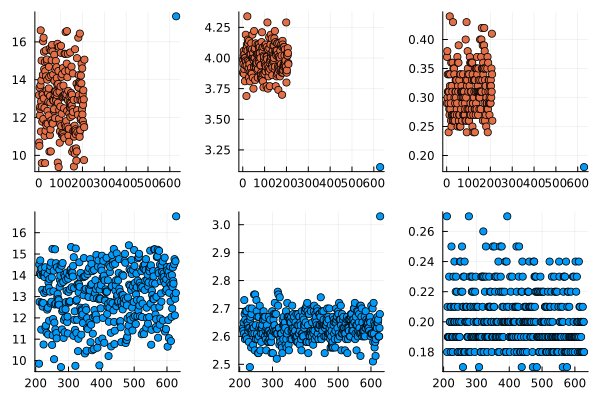

In [38]:
using StatsPlots

@df testing_set scatter(
    [:length, :weight, :w_l_ratio],
    group = :species,
    layout = (2,3),
    legend = :false,
    )

In [39]:
## check the null values of the testing dataset

In [40]:
allowmissing!(testing_set)
col_has_missing = map(col->any(ismissing,col), eachcol(data_set))
col_has_missing

4-element Vector{Bool}:
 0
 0
 0
 0

In [41]:
## Drop the target variable from testing set

In [42]:
testing_set_new = Matrix(testing_set[:,Not(:species)])
first(testing_set_new,5)

5-element Vector{Union{Missing, Float64}}:
 13.19
 10.68
 10.5
 13.58
 12.11

In [43]:
testing_set_new

629×3 Matrix{Union{Missing, Float64}}:
 13.19  3.88  0.29
 10.68  3.98  0.37
 10.5   3.95  0.38
 13.58  4.02  0.3
 12.11  4.06  0.34
 12.46  3.87  0.31
 12.58  3.91  0.31
 13.71  4.03  0.29
 16.61  4.0   0.24
 11.26  3.81  0.34
 12.85  4.0   0.31
 13.96  3.94  0.28
 15.01  3.98  0.27
  ⋮           
 14.37  2.63  0.18
 13.73  2.65  0.19
 13.61  2.67  0.2
 13.01  2.65  0.2
 14.52  2.66  0.18
 14.76  2.6   0.18
 12.12  2.6   0.21
 12.9   2.6   0.2
 14.66  2.63  0.18
 13.17  2.68  0.2
 16.77  3.03  0.18
 17.35  3.11  0.18

In [46]:
# Assuming the model expects Union{Missing, Float64} data type
#31.25	6.14	0.2
#30.61	6.08	0.2
# 29.66	6.08	0.21
# 17.17  3.05  0.18
#	13.75	2.61	0.19
#	30.56	6.11	0.2
# 29.92	6.13	0.2
# 20.21	3.29	0.16
# 18.03	3.04	0.17
#  17.97  3.35  0.19
# 19.01  3.04  0.16
# 12.46	2.62	0.21
#	13.17	2.68	0.2
# 7.17	3.39	0.47
# 12.44	2.66	0.21
# 17.65	3.17	0.18
# 16.77	3.03	0.18
# 13.17	2.68	0.2
# 14.41	2.65	0.18
# 17.35	3.11	0.18
# 12.12	2.6	0.21
# 11.28	3.97	0.35
#17.35	3.11	0.18

sample_data = [16.77,3.03, 0.18]
# Handle missing data or mismatched types
sample_data = Vector{Union{Missing, Float64}}(sample_data)

# Reshape the data to a 1xN matrix if needed
sample_matrix = reshape(sample_data, 1, :)

# Then predict
predictions = DecisionTree.predict(model, sample_matrix)

1-element Vector{Union{Missing, String31}}:
 "Otolithoides biauritus"